In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('parsed_games.csv')

In [4]:
len(df)

3825377

In [5]:
df['white_castles'].unique(),df['black_castles'].unique()

(array(['kingside', 'x', 'queenside'], dtype=object),
 array(['x', 'kingside', 'queenside'], dtype=object))

In [6]:
df['rating_diff'] = df['white_elo'] - df['black_elo']

In [8]:
df['baseline_prediction'] = (df['white_elo'] >= df['black_elo']).astype(int)

In [9]:
df['correct_baseline'] = df['baseline_prediction'] == df['white_win']

In [10]:
df.columns

Index(['total_moves', 'time_control', 'white_win', 'white_elo', 'black_elo',
       'eco', 'white_castles', 'black_castles',
       'white_total_left_wing_pawn_moves', 'white_total_center_pawn_moves',
       'white_total_right_wing_pawn_moves', 'white_total_knight_moves',
       'white_total_bishop_moves', 'white_total_rook_moves',
       'white_total_queen_moves', 'white_total_king_moves',
       'black_total_left_wing_pawn_moves', 'black_total_center_pawn_moves',
       'black_total_right_wing_pawn_moves', 'black_total_knight_moves',
       'black_total_bishop_moves', 'black_total_rook_moves',
       'black_total_queen_moves', 'black_total_king_moves',
       'white_doubled_pawn_files', 'black_doubled_pawn_files',
       'white_no_pawn_files', 'black_no_pawn_files',
       'white_total_isolated_pawn_files', 'black_total_isolated_pawn_files',
       'white_total_pawns', 'white_total_knights', 'white_total_bishops',
       'white_total_rooks', 'white_total_queens', 'black_total_pawns',

In [11]:
df.describe()

,total_moves,white_win,white_elo,black_elo,white_total_left_wing_pawn_moves,white_total_center_pawn_moves,white_total_right_wing_pawn_moves,white_total_knight_moves,white_total_bishop_moves,white_total_rook_moves,...,white_furthest_pawn,black_furthest_pawn,white_total_king_blockers,black_total_king_blockers,white_total_hanging_pawns,white_total_hanging_pieces,black_total_hanging_pawns,black_total_hanging_pieces,rating_diff,baseline_prediction
count,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06,...,3.825365e+06,3.825360e+06,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06,3.825377e+06
mean,7.912227e+01,5.009253e-01,1.763344e+03,1.765571e+03,2.124616e+00,3.128971e+00,1.641989e+00,4.486369e+00,3.988511e+00,1.260163e+00,...,4.153817e+00,4.901586e+00,2.425923e+00,2.472191e+00,1.928367e-01,1.593001e-01,1.758836e-01,1.216283e-01,-2.227425e+00,4.981658e-01
std,2.341669e+01,4.999992e-01,2.704792e+02,2.711466e+02,1.532670e+00,1.000561e+00,1.449054e+00,1.697690e+00,1.531807e+00,1.199394e+00,...,9.092145e-01,8.606519e-01,9.785759e-01,1.004205e+00,4.358986e-01,3.878668e-01,4.182488e-01,3.459912e-01,1.986781e+02,4.999967e-01
min,5.000000e+01,0.000000e+00,7.340000e+02,7.450000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.491000e+03,0.000000e+00
25%,6.100000e+01,0.000000e+00,1.579000e+03,1.582000e+03,1.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,...,4.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.080000e+02,0.000000e+00
50%,7.400000e+01,1.000000e+00,1.761000e+03,1.763000e+03,2.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,...,4.000000e+00,5.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
75%,9.200000e+01,1.000000e+00,1.943000e+03,1.946000e+03,3.000000e+00,4.000000e+00,2.000000e+00,6.000000e+00,5.000000e+00,2.000000e+00,...,5.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.040000e+02,1.000000e+00
max,4.270000e+02,1.000000e+00,3.103000e+03,3.103000e+03,1.200000e+01,1.000000e+01,1.200000e+01,2.000000e+01,1.800000e+01,1.800000e+01,...,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,1.564000e+03,1.000000e+00


In [12]:
df['white_win'].sum()

1916228

In [14]:
whitecastledf = df.groupby(by='white_castles').size()

white_castles
kingside     2698272
queenside     482479
x             644626
dtype: int64

In [15]:
black cdf.groupby(by='black_castles').size()

black_castles
kingside     2561277
queenside     444340
x             819760
dtype: int64

In [16]:
df['castle_combo'] = df['white_castles'] + '-' + df['black_castles']

In [21]:
castlecombodf = df.groupby(by='castle_combo').size()

AttributeError: 'Series' object has no attribute 'columns'

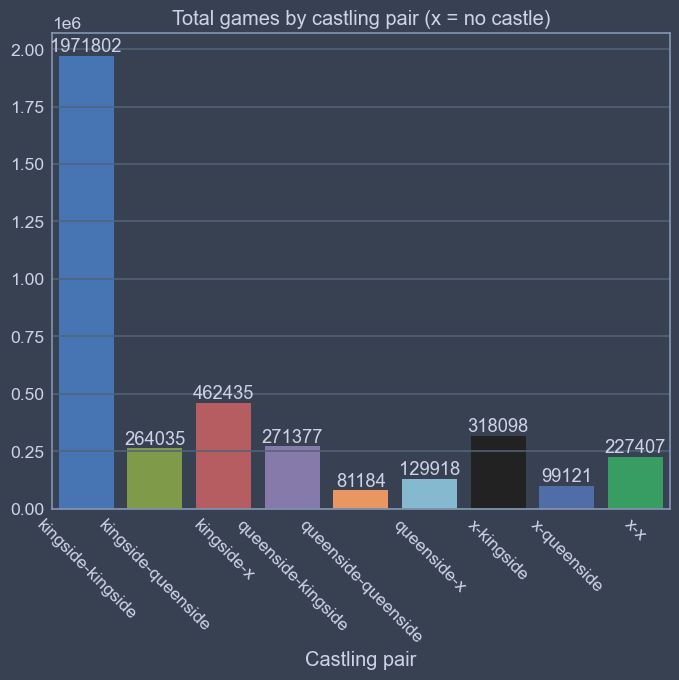

In [26]:
fig,ax = plt.subplots(figsize=(7,7))
ax = sns.barplot(x=castlecombodf.index,y=castlecombodf)
plt.xticks(rotation=-45)
plt.title('Total games by castling pair (x = no castle)')
plt.ylabel('')
plt.xlabel('Castling pair')
for container in ax.containers:
    ax.bar_label(container,fmt='%.0f')
plt.tight_layout()
plt.savefig('./figs/gamespercastlepair.png')

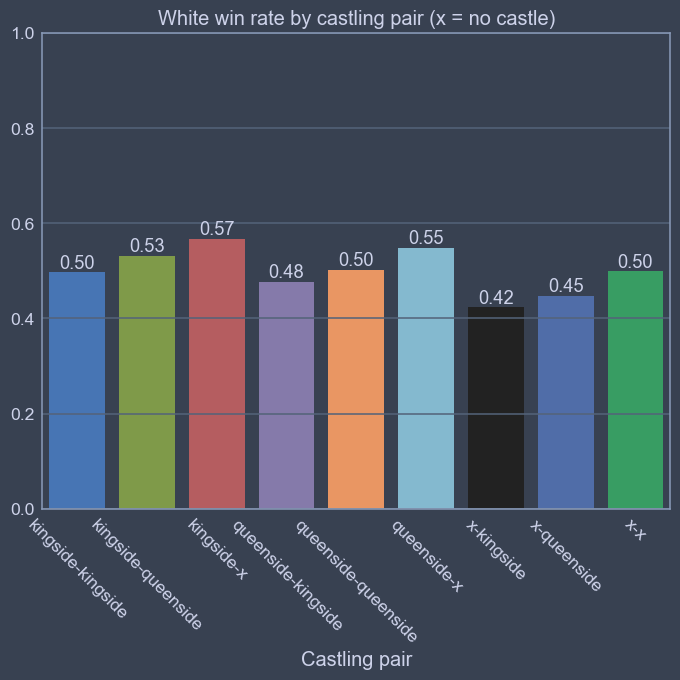

In [40]:
castlecombodf = df[['castle_combo','white_win']].groupby(by='castle_combo').mean()
fig,ax = plt.subplots(figsize=(7,7))
ax = sns.barplot(x=castlecombodf.index,y=castlecombodf['white_win'])
plt.ylim(0,1)
plt.xticks(rotation=-45)
plt.title('White win rate by castling pair (x = no castle)')
plt.ylabel('')
plt.xlabel('Castling pair')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/winratepercastlepair.png')

<AxesSubplot: xlabel='total_moves', ylabel='count'>

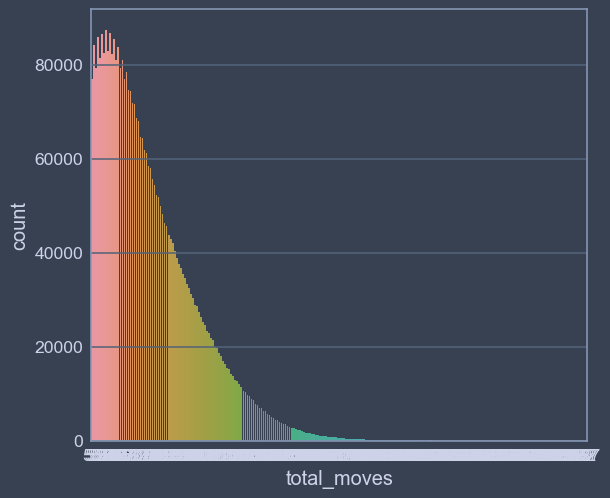

In [66]:
sns.countplot(data=df,x='total_moves')

In [27]:
df['total_move_buckets'] = pd.cut(df['total_moves'],[50,60,70,80,90,100,110,500],right=False)

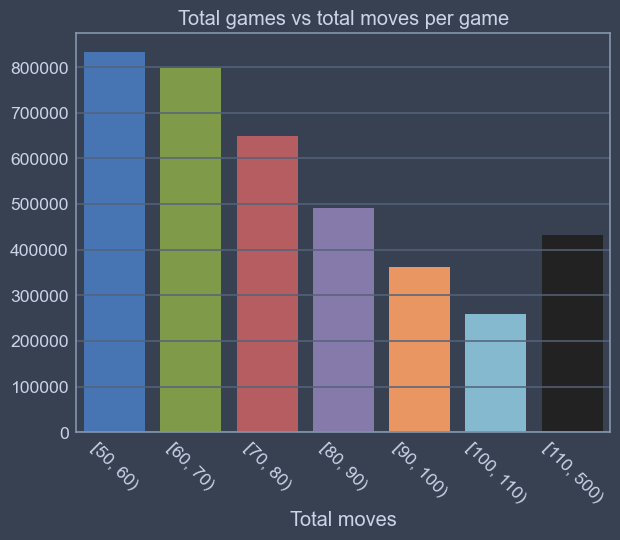

In [28]:
sns.countplot(data=df,x='total_move_buckets')
plt.xlabel('Total moves')
plt.xticks(rotation=-45)
plt.ylabel('')
plt.title('Total games vs total moves per game')
plt.tight_layout()
plt.savefig('./figs/gamespermoves.png')

In [29]:
total_move_rate = df[['total_move_buckets','correct_baseline']].groupby(by='total_move_buckets').mean()

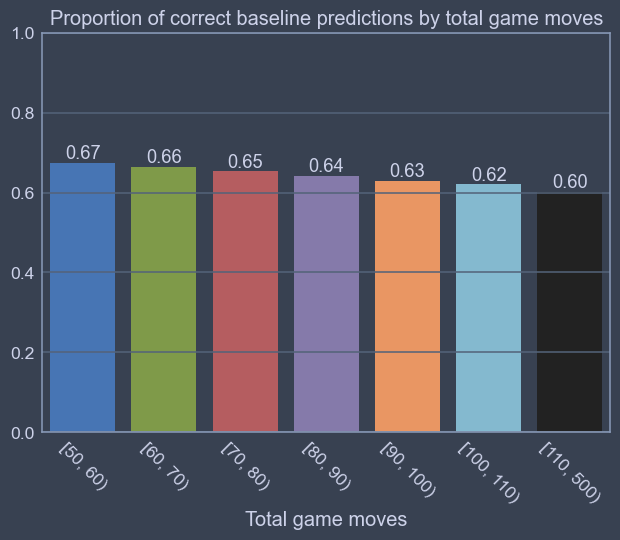

In [30]:
ax = sns.barplot(x=total_move_rate.index,y=total_move_rate['correct_baseline'])
plt.ylim(0,1)
plt.xticks(rotation=-45)
plt.title('Proportion of correct baseline predictions by total game moves')
plt.ylabel('')
plt.xlabel('Total game moves')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/baselineaccuracypermoves.png')

In [31]:
df['rating_diff_buckets_real'] = pd.cut(df['rating_diff'],[-5000,-400,-300,-250,-200,-175,-150,-125,-100,-75,-50,-25,25,50,75,100,125,150,175,200,250,300,350,400,5000],right=False)

In [32]:
df['rating_diff_buckets'] = pd.cut(df['rating_diff'].abs(),[0,25,50,75,100,125,150,175,200,250,300,350,400,5000],right=False)

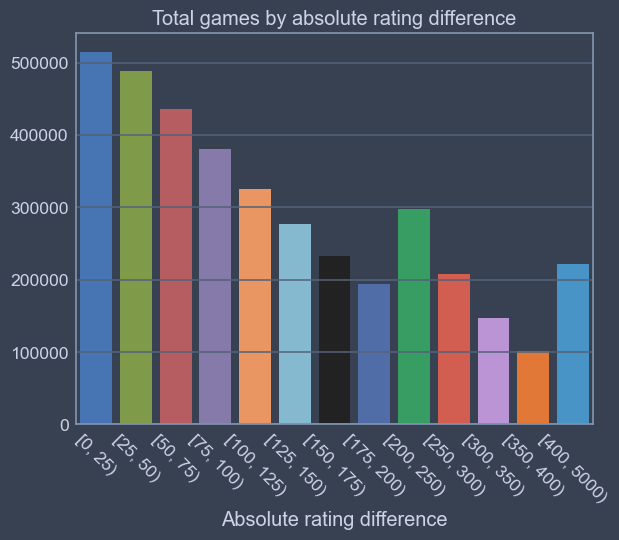

In [33]:
sns.countplot(x=df['rating_diff_buckets'])
plt.xlabel('Absolute rating difference')
plt.xticks(rotation=-45)
plt.title('Total games by absolute rating difference')
plt.ylabel('')
plt.tight_layout()
plt.savefig('./figs/gamesperrating.png')

In [34]:
rating_diff_rate = df[['rating_diff_buckets','correct_baseline']].groupby(by='rating_diff_buckets').mean()
rating_diff_rate

,correct_baseline
rating_diff_buckets,
"[0, 25)",0.514341
"[25, 50)",0.543558
"[50, 75)",0.571379
"[75, 100)",0.599916
"[100, 125)",0.628071
"[125, 150)",0.657883
"[150, 175)",0.681816
"[175, 200)",0.708326
"[200, 250)",0.741775


In [35]:
rating_diff_rate.columns

Index(['correct_baseline'], dtype='object')

In [36]:
rating_diff_rate.index

CategoricalIndex([    [0, 25),    [25, 50),    [50, 75),   [75, 100),
                   [100, 125),  [125, 150),  [150, 175),  [175, 200),
                   [200, 250),  [250, 300),  [300, 350),  [350, 400),
                  [400, 5000)],
                 categories=[[0, 25), [25, 50), [50, 75), [75, 100), [100, 125), [125, 150), [150, 175), [175, 200), ...], ordered=True, dtype='category', name='rating_diff_buckets')

In [37]:
rating_diff_rate_real = df[['rating_diff_buckets_real','white_win']].groupby(by='rating_diff_buckets_real').mean()
rating_diff_rate_real

,white_win
rating_diff_buckets_real,
"[-5000, -400)",0.098313
"[-400, -300)",0.168738
"[-300, -250)",0.216011
"[-250, -200)",0.258122
"[-200, -175)",0.292842
"[-175, -150)",0.320064
"[-150, -125)",0.343543
"[-125, -100)",0.374323
"[-100, -75)",0.403499


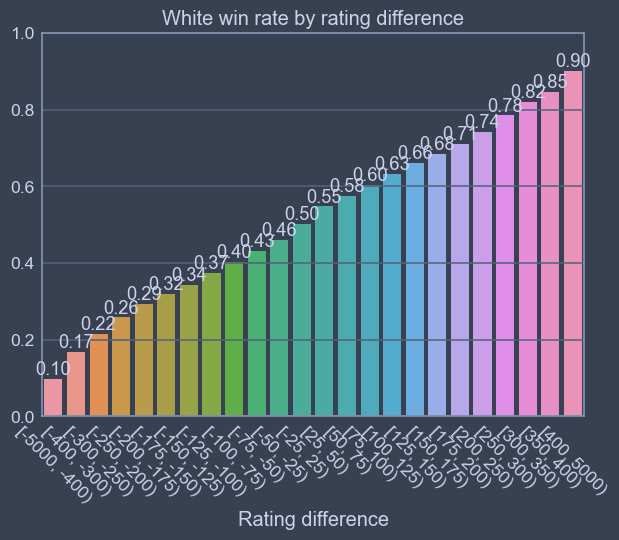

In [38]:
ax = sns.barplot(x=rating_diff_rate_real.index,y=rating_diff_rate_real['white_win'])
plt.ylim(0,1)
plt.xticks(rotation=-45)
plt.title('White win rate by rating difference')
plt.ylabel('')
plt.xlabel('Rating difference')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/winrateperratingdiff.png')

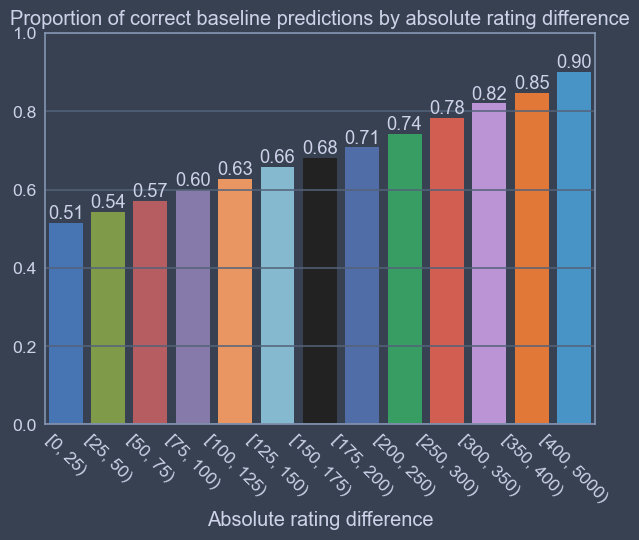

In [189]:
ax = sns.barplot(x=rating_diff_rate.index,y=rating_diff_rate['correct_baseline'])
plt.ylim(0,1)
plt.xticks(rotation=-45)
plt.title('Proportion of correct baseline predictions by absolute rating difference')
plt.ylabel('')
plt.xlabel('Absolute rating difference')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/baselineaccuracybyratingdifference.png')

In [84]:
df[['white_castles','white_win']].groupby(by=['white_castles']).mean()

,white_win
white_castles,
kingside,0.512239
queenside,0.500420
x,0.453947


In [83]:
df[['white_castles','time_control','white_win']].groupby(by=['white_castles','time_control']).mean()

white_win
white_castles time_control           
kingside      blitz          0.510412
              bullet         0.509293
              classical      0.529626
              rapid          0.519701
queenside     blitz          0.501619
              bullet         0.500014
              classical      0.514262
              rapid          0.497603
x             blitz          0.457304
              bullet         0.457167
              classical      0.448608
              rapid          0.447352

In [101]:
tempdf = df[(df['white_castles'] == 'kingside') & (df['black_castles'] == 'kingside')]
tempdf[['white_castles','white_total_right_wing_pawn_moves','white_win']].groupby(by=['white_castles','white_total_right_wing_pawn_moves']).mean()

white_win
white_castles white_total_right_wing_pawn_moves           
kingside      0                                   0.502024
              1                                   0.501954
              2                                   0.485322
              3                                   0.486919
              4                                   0.492046
              5                                   0.504452
              6                                   0.517742
              7                                   0.555049
              8                                   0.579841
              9                                   0.625592
              10                                  0.708333
              11                                  0.600000

In [114]:
white_att_squares = df[['white_total_attacked_squares','white_win']].groupby(by=['white_total_attacked_squares']).mean()

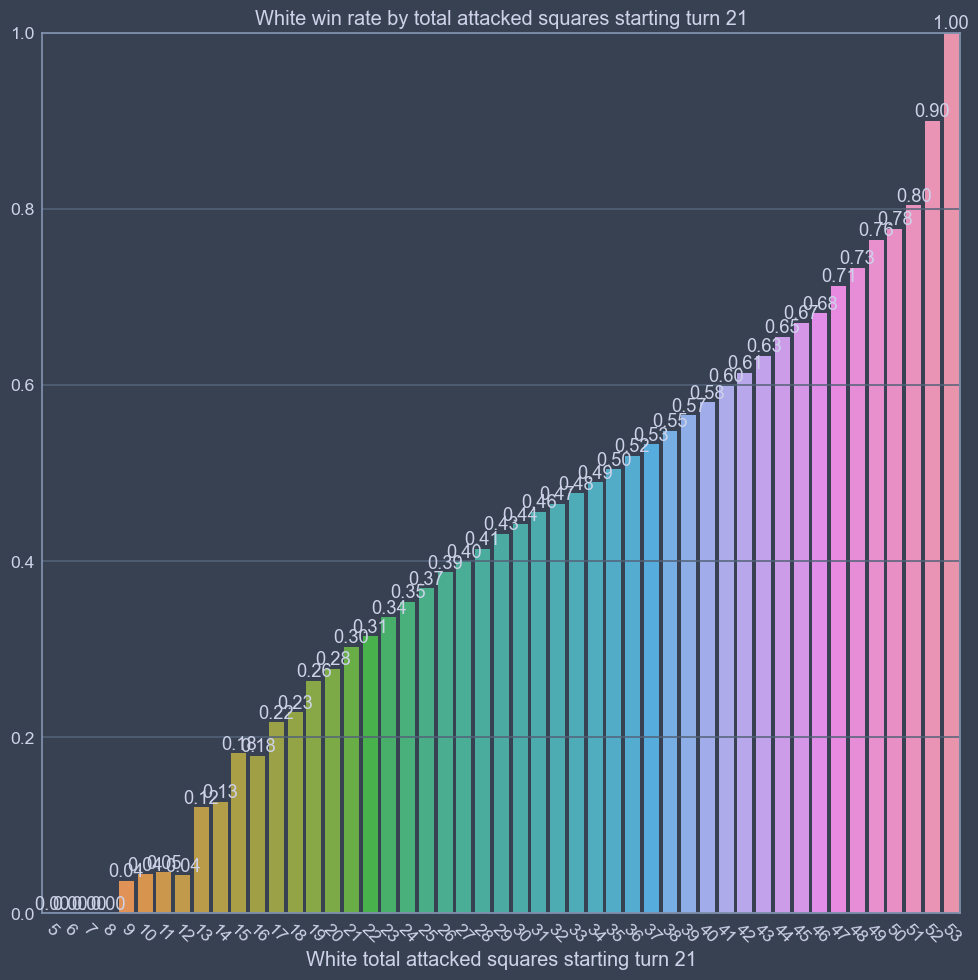

In [174]:
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x=white_att_squares.index,y=white_att_squares['white_win'])
plt.ylim(0,1)
plt.xticks(rotation=-45)
plt.title('White win rate by total attacked squares starting turn 21')
plt.ylabel('')
plt.xlabel('White total attacked squares starting turn 21')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/winratebyattackedsquares.png')

In [128]:
white_att_pieces = df[['white_total_attacked_pieces','white_win']].groupby(by=['white_total_attacked_pieces']).mean()

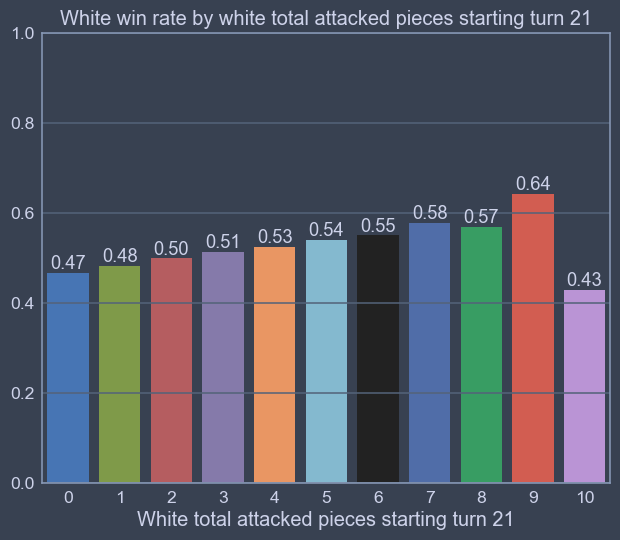

In [185]:
#fig,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=white_att_pieces.index,y=white_att_pieces['white_win'])
plt.ylim(0,1)
plt.title('White win rate by white total attacked pieces starting turn 21')
plt.ylabel('')
plt.xlabel('White total attacked pieces starting turn 21')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/winratebyattackedpieces.png')

In [133]:
white_def_pieces = df[['white_total_defended_pieces','white_win']].groupby(by=['white_total_defended_pieces']).mean()

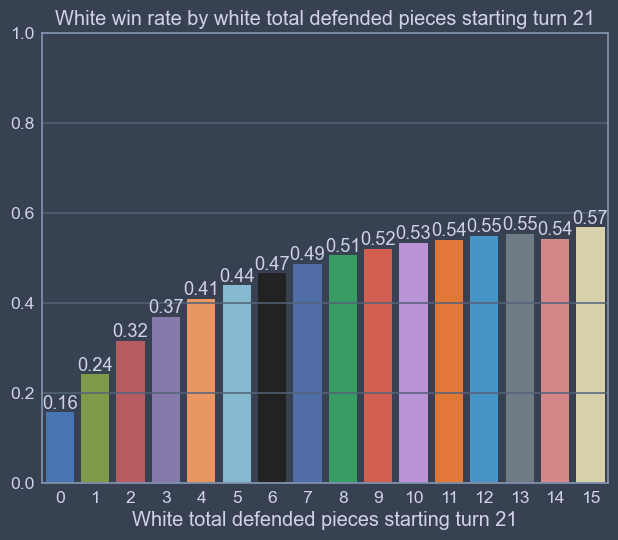

In [186]:
#fig,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=white_def_pieces.index,y=white_def_pieces['white_win'])
plt.ylim(0,1)
plt.title('White win rate by white total defended pieces starting turn 21')
plt.ylabel('')
plt.xlabel('White total defended pieces starting turn 21')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/winratebydefendedpieces.png')

In [143]:
white_hang_pieces = df[['white_total_hanging_pieces','white_win']].groupby(by=['white_total_hanging_pieces']).mean()

In [144]:
black_hang_pieces = df[['black_total_hanging_pieces','white_win']].groupby(by=['black_total_hanging_pieces']).mean()

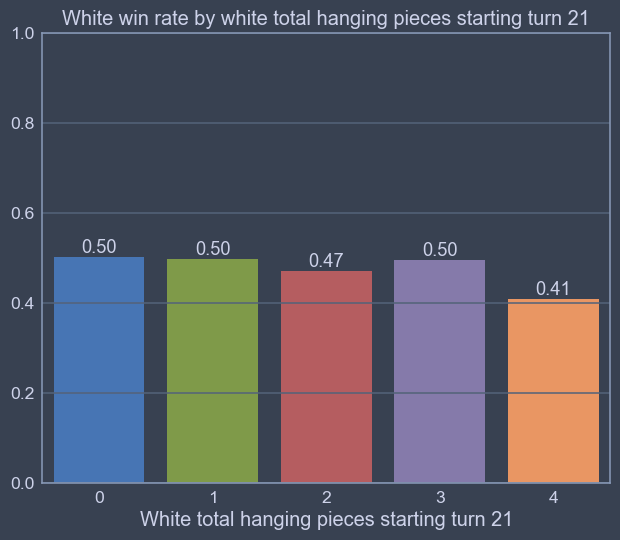

In [177]:
#fig,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=white_hang_pieces.index,y=white_hang_pieces['white_win'])
plt.ylim(0,1)
plt.title('White win rate by white total hanging pieces starting turn 21')
plt.ylabel('')
plt.xlabel('White total hanging pieces starting turn 21')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/winratebywhitehangingpieces.png')

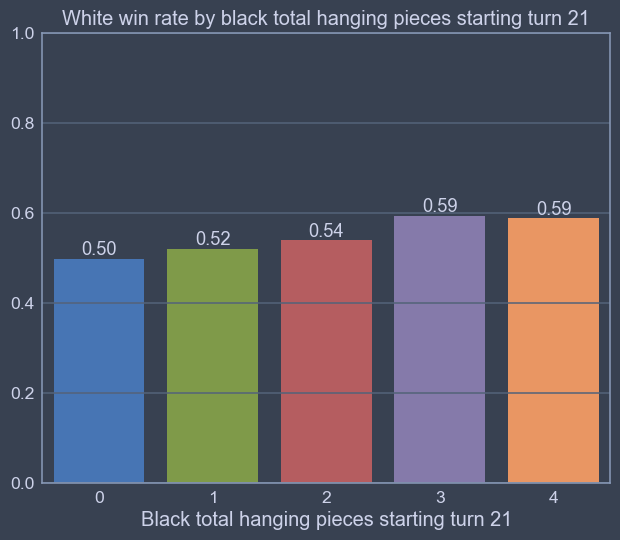

In [178]:
#fig,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=black_hang_pieces.index,y=black_hang_pieces['white_win'])
plt.ylim(0,1)
plt.title('White win rate by black total hanging pieces starting turn 21')
plt.ylabel('')
plt.xlabel('Black total hanging pieces starting turn 21')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/winratebyblackhangingpieces.png')

In [201]:
white_material = df['white_total_pawns'] + 3*df['white_total_knights'] + 3*df['white_total_bishops'] + 5*df['white_total_rooks'] + 9*df['white_total_queens']
black_material = df['black_total_pawns'] + 3*df['black_total_knights'] + 3*df['black_total_bishops'] + 5*df['black_total_rooks'] + 9*df['black_total_queens']
material_difference = white_material-black_material

In [ ]:
tempdf = pd.DataFrame({'material_difference':material_difference,'white_win':df['white_win']})
tempdf['material_difference_buckets'] = pd.cut(tempdf['material_difference'],[-50,-30,-25,-20,-15,-10,-7,-4,-1,1,4,7,10,15,20,25,30,50])
material_diff_rate = tempdf.groupby(by='material_difference_buckets').mean()
#fig,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=material_diff_rate.index,y=material_diff_rate['white_win'])
plt.ylim(0,1)
plt.title('White win rate by material difference starting turn 21')
plt.ylabel('')
plt.xticks(rotation=-45)
plt.xlabel('Material difference starting turn 21')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./winratebymaterialdifference.png')

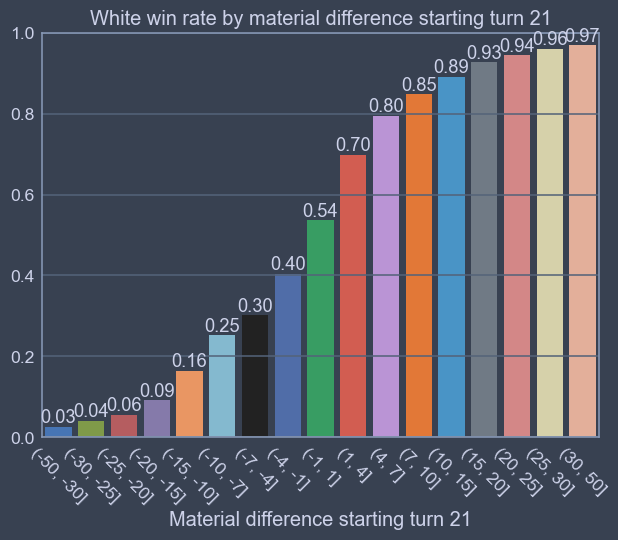

In [203]:
tempdf = pd.DataFrame({'material_difference':material_difference,'white_win':df['white_win']})
tempdf['material_difference_abs_buckets'] = pd.cut(tempdf['material_difference'],[-50,-30,-25,-20,-15,-10,-7,-4,-1,1,4,7,10,15,20,25,30,50])
material_diff_rate = tempdf.groupby(by='material_difference_abs_buckets').mean()
#fig,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=material_diff_rate.index,y=material_diff_rate['white_win'])
plt.ylim(0,1)
plt.title('White win rate by material difference starting turn 21')
plt.ylabel('')
plt.xticks(rotation=-45)
plt.xlabel('Material difference starting turn 21')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/winratebymaterialdifference.png')

In [162]:
tempdf['material_difference'].value_counts()

 0     1104807
-1      526111
 1      418556
-2      288899
-3      250812
        ...   
-43          1
 40          1
 38          1
 47          1
-44          1
Name: material_difference, Length: 90, dtype: int64

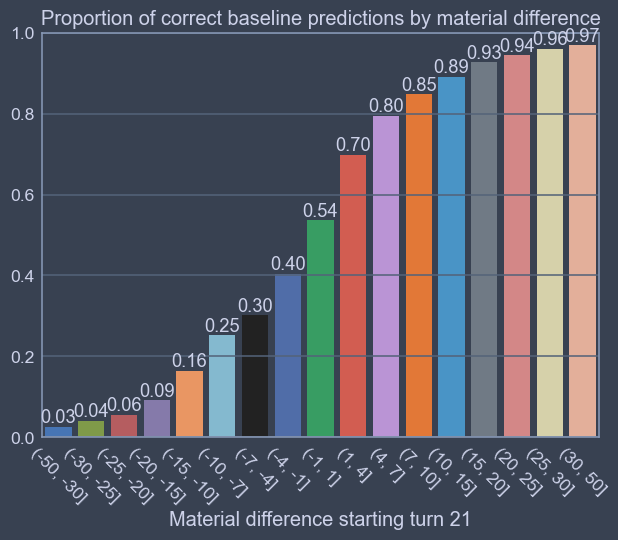

In [206]:
tempdf = pd.DataFrame({'material_difference':material_difference,'white_win':df['white_win']})
tempdf['material_difference_buckets'] = pd.cut(tempdf['material_difference'],[-50,-30,-25,-20,-15,-10,-7,-4,-1,1,4,7,10,15,20,25,30,50])
material_diff_rate = tempdf.groupby(by='material_difference_buckets').mean()
#fig,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=material_diff_rate.index,y=material_diff_rate['white_win'])
plt.ylim(0,1)
plt.title('Proportion of correct baseline predictions by material difference')
plt.ylabel('')
plt.xticks(rotation=-45)
plt.xlabel('Material difference starting turn 21')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/baselinewinratebymaterialdifference.png')

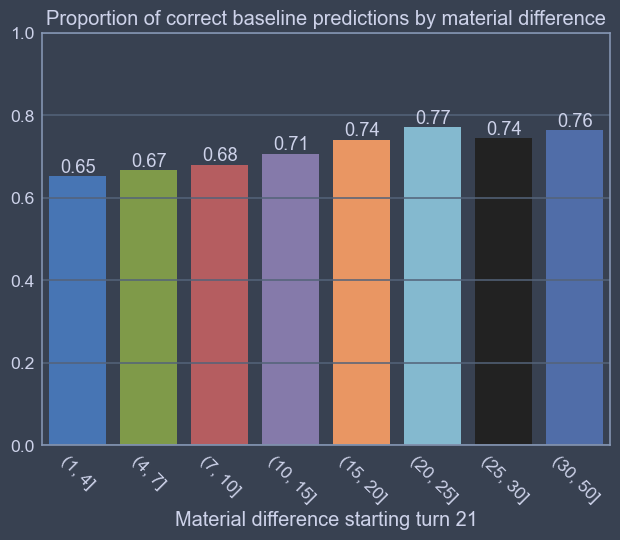

In [208]:
tempdf = pd.DataFrame({'material_difference':material_difference,'correct_baseline':df['correct_baseline']})
tempdf['material_difference_buckets_abs'] = pd.cut(tempdf['material_difference'].abs(),[1,4,7,10,15,20,25,30,50])
material_diff_rate = tempdf.groupby(by='material_difference_buckets_abs').mean()
#fig,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=material_diff_rate.index,y=material_diff_rate['correct_baseline'])
plt.ylim(0,1)
plt.title('Proportion of correct baseline predictions by material difference')
plt.ylabel('')
plt.xticks(rotation=-45)
plt.xlabel('Material difference starting turn 21')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/baselineaccuracybymaterialdifference.png')

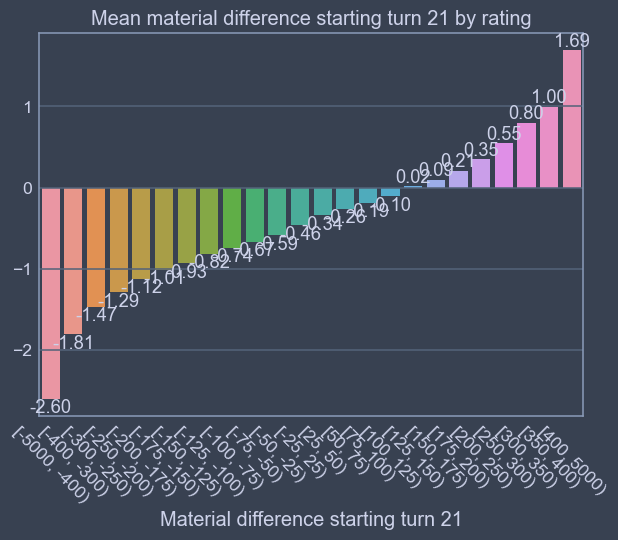

In [215]:
tempdf = pd.DataFrame({'material_difference':material_difference,'rating_diff_buckets_real':df['rating_diff_buckets_real']})
material_diff_rating = tempdf.groupby(by='rating_diff_buckets_real').mean()
#fig,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=material_diff_rating.index,y=material_diff_rating['material_difference'])
#plt.ylim(0,1)
plt.title('Mean material difference starting turn 21 by rating')
plt.ylabel('')
plt.xticks(rotation=-45)
plt.xlabel('Material difference starting turn 21')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.savefig('./figs/materialdifferencebyrating.png')

In [226]:
tempdf[tempdf['material_difference'].abs() < 15].groupby(by='rating_diff_buckets_real').mean()

,material_difference
rating_diff_buckets_real,
"[-5000, -400)",-2.324495
"[-400, -300)",-1.659599
"[-300, -250)",-1.354111
"[-250, -200)",-1.204522
"[-200, -175)",-1.054369
"[-175, -150)",-0.964952
"[-150, -125)",-0.884187
"[-125, -100)",-0.780741
"[-100, -75)",-0.707986


In [220]:
material_difference.describe()

count    3.825377e+06
mean    -4.683800e-01
std      3.650925e+00
min     -4.700000e+01
25%     -2.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.700000e+01
dtype: float64